<a href="https://colab.research.google.com/github/terry0809000/tensorflow22/blob/main/01neuralnetworkregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import torch
from torch import nn

In [76]:
import matplotlib.pyplot as plt

In [77]:
torch.__version__

'2.9.0+cu126'

In [78]:
weight =0.7
bias = 0.3

start = 0
end = 1
step = 0.02
x=torch.arange(start,end,step).unsqueeze(1)
y=weight*x+bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [79]:
len(x), len(y)

(50, 50)

In [80]:
#lets create a training and tetsing set with our datasets
train_split =int(0.8 *len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [81]:
def plot_prediction(train_data = x_train,
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=None):
  """
  plots training data, test data and compares predicytion.
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  #are there predictions? check:
  if predictions is not None:
    #plot predictions in red
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  #show the legend
  plt.legend(prop={"size":14});

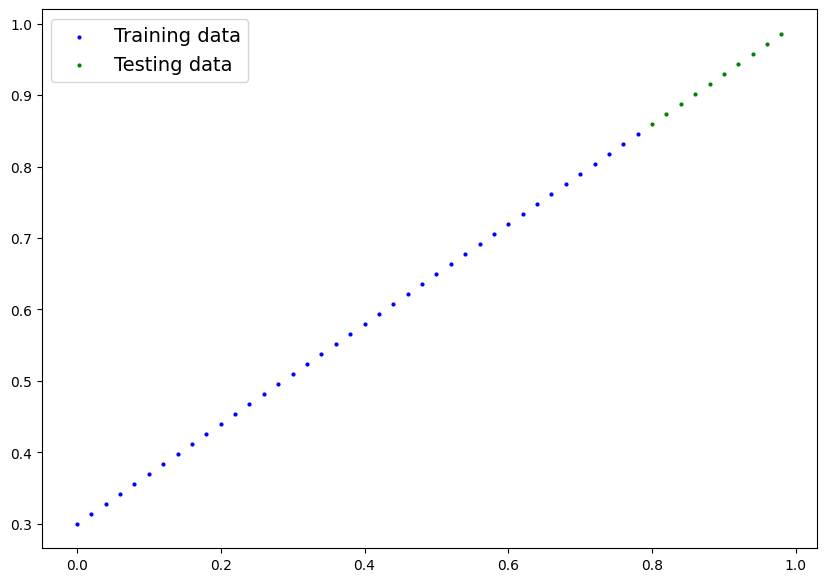

In [82]:
plot_prediction();

In [83]:
#creeate linear regression model class
class LinearRegressionModel(nn.Module):
  """
  linear regression model
  """
  def __init__(self):
    super().__init__()
    # Use nn.Linear() to create the linear layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:  # x is the input data
    return self.linear_layer(x) # This performs the linear regression calculation

In [84]:
model_0 = LinearRegressionModel()
torch.nn.init.xavier_normal_(model_0.linear_layer.weight)
torch.nn.init.zeros_(model_0.linear_layer.bias)
#def forward ()- all nn.module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

Parameter containing:
tensor([0.], requires_grad=True)

In [85]:
####chewcking the contents of our pytorch model

In [86]:
#create a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [87]:
#LIST NAMED PARAMETERS
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [88]:
#make predictions with model
with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

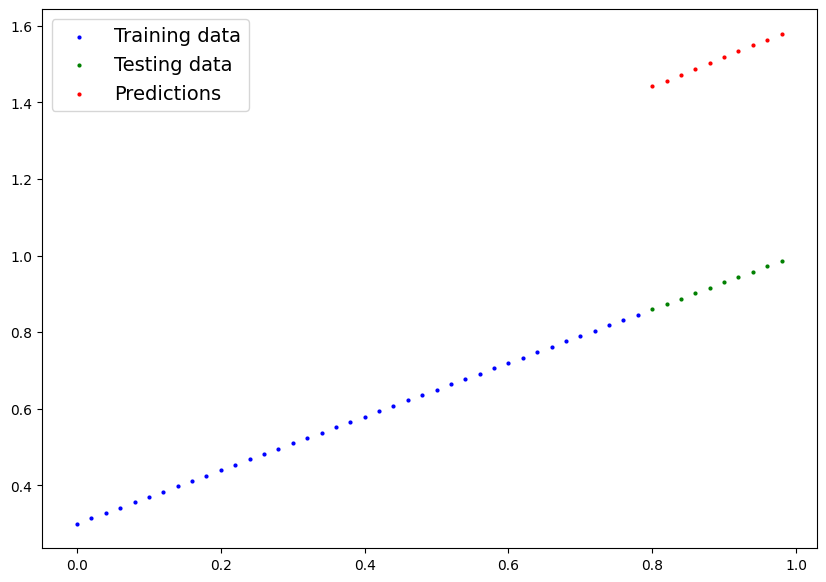

In [89]:
plot_prediction(predictions=y_preds)

In [90]:
#loss function: a function to measure how worng your model's prediction are to the ideal outputs, lower is better
#optimizer: take into account the loss of a model and adjusts the model's parameters(e.g.,weights and bias)

In [91]:
list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [92]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [93]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

A couple of things we need in a training loops:
1. loop througgh the data
2. forward pass(involves data moving through our model's `forward()` functions) to make predictions on data -also called forward propagation
3. calculate the loss (compare forward pass predictions to ground truth lables)
4. optimizer zero grad
5. loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(**backpropagation**)

6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)




In [94]:
with torch.no_grad():
  list(model_0.parameters())



In [95]:
with torch.inference_mode():
  model_0.parameters()


In [96]:
epochs = 1

for epoch in range (epochs):
  model_0.train() #train mode in PyTorch set
  y_pred = model_0(x_train) #forward pass
  loss = loss_fn(y_pred, y_train) #calculate the loss

  optimizer.zero_grad() #optimizer zero grad
  loss.backward() #perform backpropagation on the loss with respect to the parameters of the mode

  optimizer.step()
  #by default how the optimizer change will accumulate through the loop so..we have to zero them above in step 3 for the next iteration of the loop
  #step the optimizer(perform gradient descent)
  model_0.eval()  #turns off gradient tracking
  with torch.inference_mode():
    test_pred = model_0(x_test)
    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089


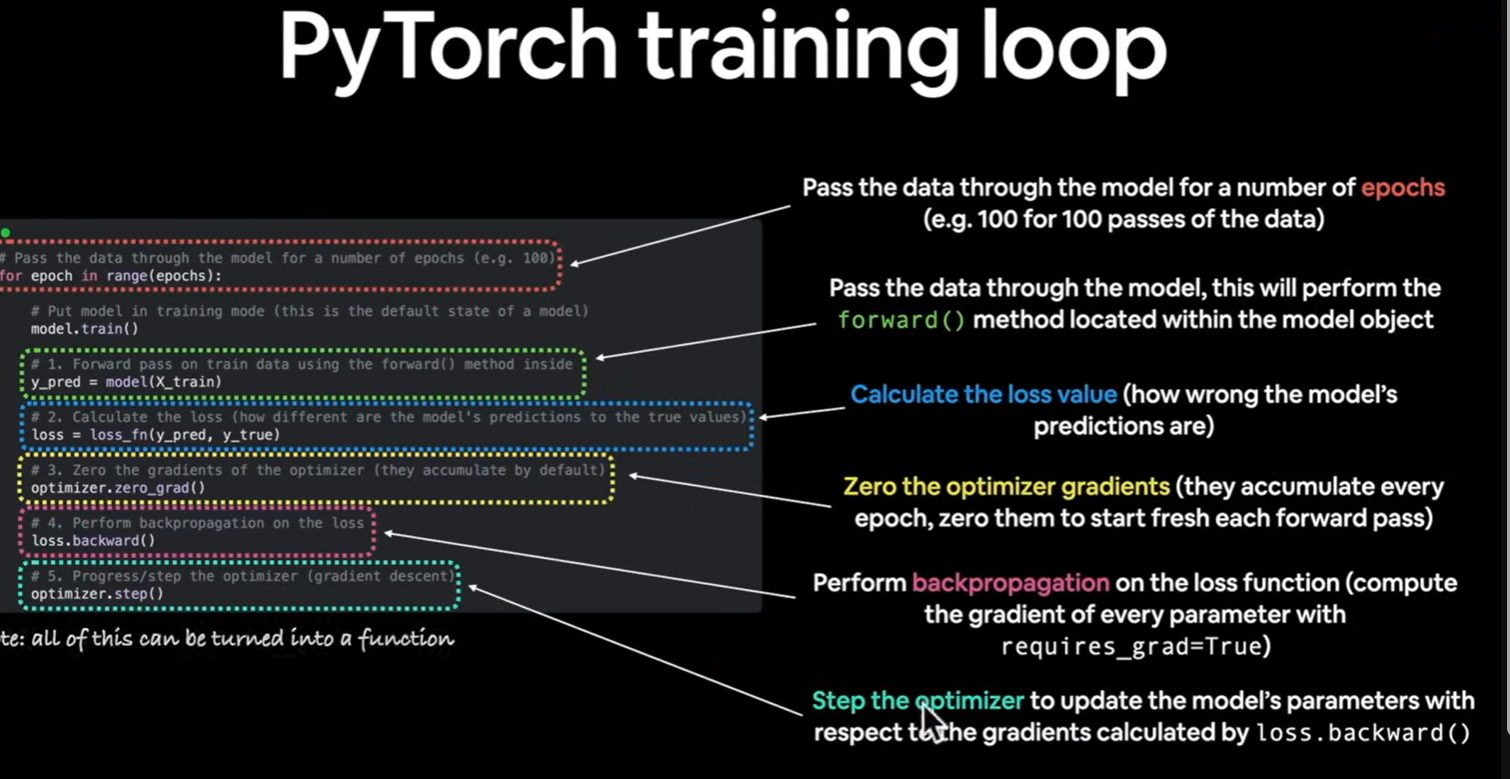

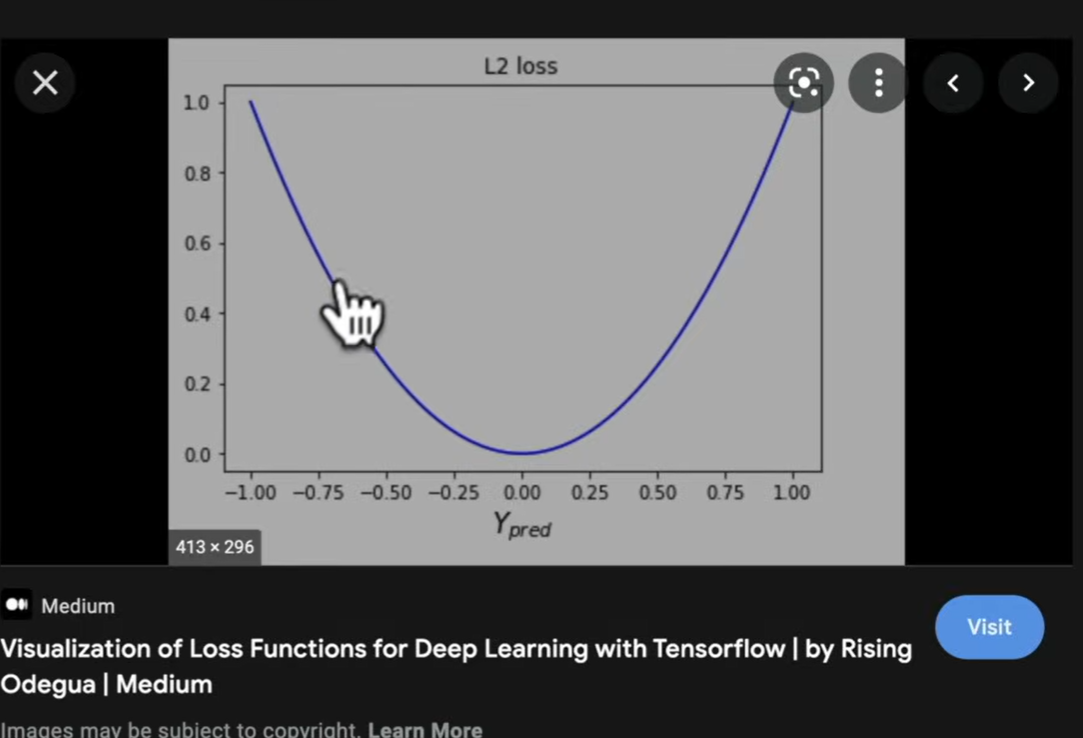

In [97]:
for epoch in range (epochs):
  model_0.train() #train mode in PyTorch set
  y_pred = model_0(x_train) #forward pass
  loss = loss_fn(y_pred, y_train)
  print(f"loss: {loss}") #calculate the loss

  optimizer.zero_grad() #optimizer zero grad
  loss.backward() #perform backpropagation on the loss with respect to the parameters of the mode

  optimizer.step()
  #by default how the optimizer change will accumulate through the loop so..we have to zero them above in step 3 for the next iteration of the loop
  #step the optimizer(perform gradient descent)
  model_0.eval() #turns off different setings in the model not needed for evaluating

loss: 0.5436569452285767


In [98]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7567]])),
             ('linear_layer.bias', tensor([0.8100]))])

In [99]:
print(model_0.state_dict())

OrderedDict({'linear_layer.weight': tensor([[0.7567]]), 'linear_layer.bias': tensor([0.8100])})


In [100]:
with torch.inference_mode():
 y_preds_new = model_0(x_test)

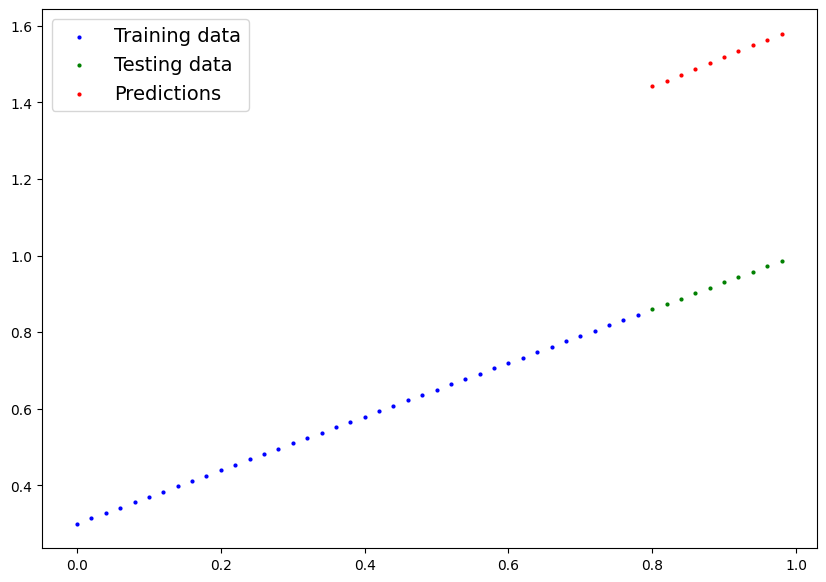

In [101]:
plot_prediction(predictions=y_preds)

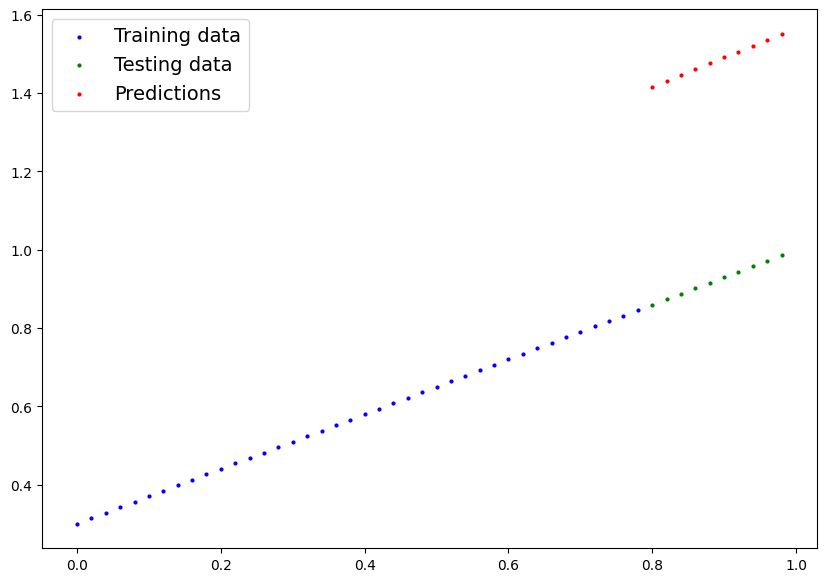

In [102]:
plot_prediction(predictions=y_preds_new)

In [103]:
epochs = 100
epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range (epochs):
  model_0.train() #train mode in PyTorch set
  y_pred = model_0(x_train) #forward pass
  loss = loss_fn(y_pred, y_train)
  print(f"loss: {loss}") #calculate the loss

  optimizer.zero_grad() #optimizer zero grad
  loss.backward() #perform backpropagation on the loss with respect to the parameters of the mode

  optimizer.step()
  #by default how the optimizer change will accumulate through the loop so..we have to zero them above in step 3 for the next iteration of the loop
  #step the optimizer(perform gradient descent)
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(x_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"epoch:{epoch}|loss :{loss}|test loss:{test_loss}")
    print(model_0.state_dict())
  #with torch.no_grad():
    #turns off different setings in the model not needed for evaluating

loss: 0.5321359634399414
epoch:0|loss :0.5321359634399414|test loss:0.5470342040061951
OrderedDict({'linear_layer.weight': tensor([[0.7528]]), 'linear_layer.bias': tensor([0.8000])})
loss: 0.5206149816513062
loss: 0.5090939998626709
loss: 0.49757298827171326
loss: 0.4860519766807556
loss: 0.47453099489212036
loss: 0.4630100131034851
loss: 0.45148906111717224
loss: 0.4399680495262146
loss: 0.42844706773757935
loss: 0.41692614555358887
epoch:10|loss :0.41692614555358887|test loss:0.41232436895370483
OrderedDict({'linear_layer.weight': tensor([[0.7138]]), 'linear_layer.bias': tensor([0.7000])})
loss: 0.4054051339626312
loss: 0.3938841223716736
loss: 0.38236314058303833
loss: 0.3708421289920807
loss: 0.35932114720344543
loss: 0.34780019521713257
loss: 0.3362792134284973
loss: 0.3247582018375397
loss: 0.31323719024658203
loss: 0.3017162084579468
epoch:20|loss :0.3017162084579468|test loss:0.2776145935058594
OrderedDict({'linear_layer.weight': tensor([[0.6748]]), 'linear_layer.bias': tensor(

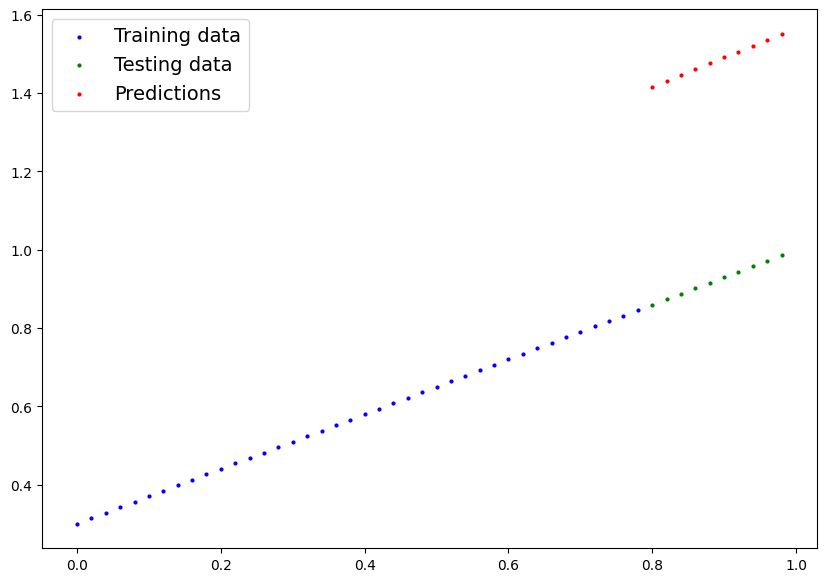

In [104]:
plot_prediction(predictions=y_preds_new)

In [105]:
epoch_count, loss_values, test_loss_values

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [tensor(0.5321, grad_fn=<MeanBackward0>),
  tensor(0.4169, grad_fn=<MeanBackward0>),
  tensor(0.3017, grad_fn=<MeanBackward0>),
  tensor(0.1865, grad_fn=<MeanBackward0>),
  tensor(0.0713, grad_fn=<MeanBackward0>),
  tensor(0.0229, grad_fn=<MeanBackward0>),
  tensor(0.0193, grad_fn=<MeanBackward0>),
  tensor(0.0158, grad_fn=<MeanBackward0>),
  tensor(0.0124, grad_fn=<MeanBackward0>),
  tensor(0.0090, grad_fn=<MeanBackward0>)],
 [tensor(0.5470),
  tensor(0.4123),
  tensor(0.2776),
  tensor(0.1429),
  tensor(0.0084),
  tensor(0.0491),
  tensor(0.0443),
  tensor(0.0360),
  tensor(0.0284),
  tensor(0.0202)])

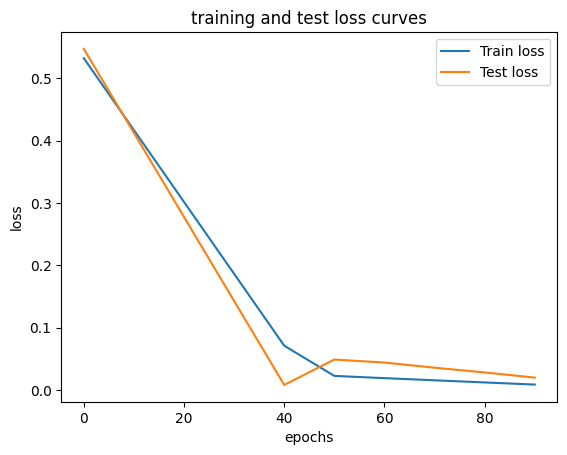

In [106]:
import numpy as np
plt.plot(epoch_count, [loss.detach().numpy() for loss in loss_values], label="Train loss")
plt.plot(epoch_count, [loss.detach().numpy() for loss in test_loss_values], label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();

In [107]:
#torch.save
#torch.load
#torch.nn.module.load_state_dict()

In [108]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME ="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to :models/01_pytorch_workflow_model_0.pth


In [109]:
!ls -1 models

01_pytorch_workflow_model_0.pth


In [110]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6725]])),
             ('linear_layer.bias', tensor([0.3115]))])

In [111]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH)) #load the saved state_dict of model_0 this will update tye new instance with updated parameters

<All keys matched successfully>

In [112]:
loaded_model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6725]])),
             ('linear_layer.bias', tensor([0.3115]))])

In [113]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(x_test)

loaded_model_preds

tensor([[0.8495],
        [0.8629],
        [0.8764],
        [0.8898],
        [0.9033],
        [0.9167],
        [0.9302],
        [0.9436],
        [0.9571],
        [0.9705]])

In [114]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [115]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds


tensor([[0.8495],
        [0.8629],
        [0.8764],
        [0.8898],
        [0.9033],
        [0.9167],
        [0.9302],
        [0.9436],
        [0.9571],
        [0.9705]])

In [116]:
#putting all together

In [117]:
class LinearRegressionModel1v2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                    out_features=1)
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

#set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModel1v2()
model_1, model_1.state_dict()



(LinearRegressionModel1v2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [118]:
#set the mdoel to use the target device
#check the mdoel current device
next(model_1.parameters()).device

device(type='cpu')

In [119]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [120]:
#6.3 Training
#set up the loss function
loss_fn = nn.L1Loss()
#setup our optimizer
optimizer = torch.optim.SGD(lr=0.01, params=model_1.parameters())

# Move data to target device
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

#let's write a training loop
torch.manual_seed(42)

epochs = 200

for epoch in range (epochs):
  model_1.train()

  #1.forward pass
  y_pred = model_1(x_train)

  #2.calculayte the loss
  loss = loss_fn(y_pred, y_train)

  #3. optimizer zero grad
  optimizer.zero_grad()
  #4. perform backpropagration

  loss.backward()

  #5. optimizer step
  optimizer.step()

  ###testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)
    test_loss = loss_fn(test_pred, y_test)
  #print out whats happening
  if epoch % 10 == 0:
    print(f"Epoch:{epoch}|Loss:{loss}|test loss:{test_loss}")

Epoch:0|Loss:0.5551779866218567|test loss:0.5739762187004089
Epoch:10|Loss:0.439968079328537|test loss:0.4392664134502411
Epoch:20|Loss:0.3247582018375397|test loss:0.30455657839775085
Epoch:30|Loss:0.20954833924770355|test loss:0.16984669864177704
Epoch:40|Loss:0.09433845430612564|test loss:0.03513690456748009
Epoch:50|Loss:0.023886388167738914|test loss:0.04784907028079033
Epoch:60|Loss:0.019956795498728752|test loss:0.045803118497133255
Epoch:70|Loss:0.016517987474799156|test loss:0.037530567497015
Epoch:80|Loss:0.013089174404740334|test loss:0.02994490973651409
Epoch:90|Loss:0.009653178043663502|test loss:0.02167237363755703
Epoch:100|Loss:0.006215683650225401|test loss:0.014086711220443249
Epoch:110|Loss:0.00278724217787385|test loss:0.005814164876937866
Epoch:120|Loss:0.0012645035749301314|test loss:0.013801801018416882
Epoch:130|Loss:0.0012645035749301314|test loss:0.013801801018416882
Epoch:140|Loss:0.0012645035749301314|test loss:0.013801801018416882
Epoch:150|Loss:0.001264503

In [121]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

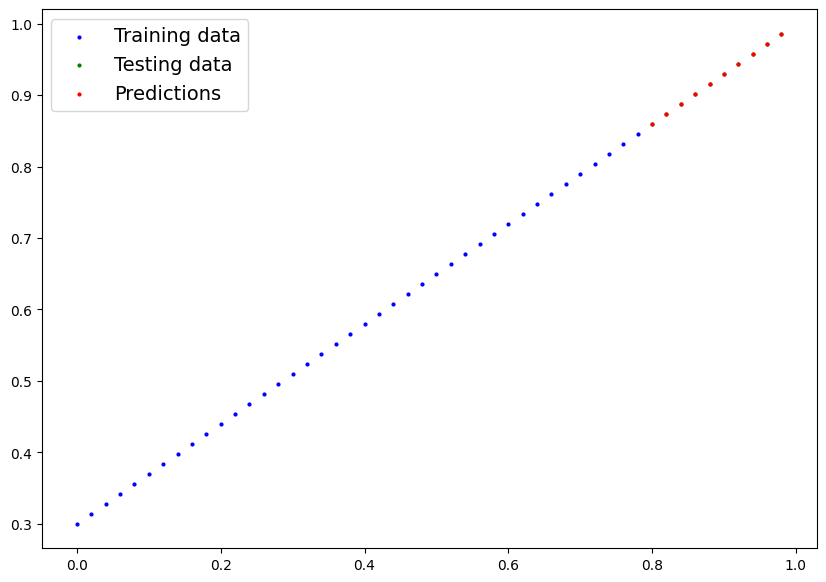

In [122]:
import matplotlib.pyplot as plt

# Define the plot_predictions function (if not already defined elsewhere)
def plot_predictions(
    train_data,
    train_labels,
    test_data,
    test_labels,
    predictions
):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data.cpu(), train_labels.cpu(), c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data.cpu(), test_labels.cpu(), c="g", s=4, label="Testing data")

    # Plot model's predictions in red
    plt.scatter(test_data.cpu(), predictions.cpu(), c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})
    plt.show()

# Get predictions from the trained model
model_1.eval() # set the model to evaluation mode
with torch.inference_mode():
    y_preds = model_1(x_test) # make predictions on the test data

# Now call the function with the necessary data
plot_predictions(
    train_data=x_train,
    train_labels=y_train,
    test_data=x_test,
    test_labels=y_test,
    predictions=y_preds
)

In [123]:
#saving and loading a trained model
from pathlib import Path
MODEL_PATH = Path ("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [131]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [132]:
#cretae a new instance of linear reegression model V2
loaded_model_1 =LinearRegressionModel1v2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModel1v2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [133]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [134]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [135]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(x_test)

y_preds==loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [129]:
# Save the trained model_1's state_dict
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)
print(f"Saved model_1 state_dict to: {MODEL_SAVE_PATH}")

Saved model_1 state_dict to: models/01_pytorch_workflow_model_0.pth


After running the cell above to save `model_1`, please re-run the following cells:

1.  The cell that loads the model (cell `JNjaSS-I3wIZ`).
2.  The cell that makes predictions with the loaded model and compares them (cell `e4pS1y_Ao2M5`).

This should now result in `y_preds == loaded_model_1_preds` returning all `True` values, indicating that the loaded model perfectly replicates the predictions of the original trained model.